In [16]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [59]:
class LogisticRegression:
    def __int__(self):
        pass
    
    def sigmoid(self,z):
        return 1/(1+np.exp(-z))

    def compute_cost(self,X, y, w, b):
        """
        Computes the cost over all examples
        Args:
          X : (ndarray Shape (m,n)) data, m examples by n features
          y : (ndarray Shape (m,))  target value 
          w : (ndarray Shape (n,))  values of parameters of the model      
          b : (scalar)              value of bias parameter of the model
        Returns:
          total_cost : (scalar) cost 
        """

        m, n = X.shape
        cost = 0.0
        for i in range(m):
            z_i = np.dot(X[i],w) + b
            f_wb_i = self.sigmoid(z_i)
            cost +=  -y[i]*np.log(f_wb_i) - (1-y[i])*np.log(1-f_wb_i)

        cost_without_reg = cost / m
    
        # You need to calculate this value
        reg_cost = 0.

        ### START CODE HERE ###
        for j in range(n):
            reg_cost += w[j]**2
        reg_cost = (self.lambda_ * reg_cost) / (2*m)

        ### END CODE HERE ### 

        # Add the regularization cost to get the total cost
        total_cost = cost_without_reg + reg_cost

        return total_cost
    
    def compute_gradient(self,X, y, w, b, ): 
        """
        Computes the gradient for logistic regression 

        Args:
          X : (ndarray Shape (m,n)) data, m examples by n features
          y : (ndarray Shape (m,))  target value 
          w : (ndarray Shape (n,))  values of parameters of the model      
          b : (scalar)              value of bias parameter of the model
          *argv : unused, for compatibility with regularized version below
        Returns
          dj_dw : (ndarray Shape (n,)) The gradient of the cost w.r.t. the parameters w. 
          dj_db : (scalar)             The gradient of the cost w.r.t. the parameter b. 
        """
        m, n = X.shape
        dj_dw = np.zeros(w.shape)
        dj_db = 0.

        for i in range(m):
            f_wb_i = self.sigmoid(np.dot(X[i],w) + b)          #(n,)(n,)=scalar
            err_i  = f_wb_i  - y[i]                       #scalar
            for j in range(n):
                dj_dw[j] = dj_dw[j] + err_i * X[i,j]      #scalar
            dj_db = dj_db + err_i
        dj_dw = dj_dw/m                                   #(n,)
        dj_db = dj_db/m  
        
#       for regularization
        for j in range(n):
            dj_dw[j] += self.lambda_ * w[j] / m 
        
        return dj_db, dj_dw
    def predict(self,x,threshold =0.5):
        return [1 if self.sigmoid(np.dot(x,self.w) + self.b)>threshold else 0]
    
    def fit(self,X, y, alpha, num_iters, lambda_): 
        """
        Performs batch gradient descent to learn theta. Updates theta by taking 
        num_iters gradient steps with learning rate alpha

        Args:
          X :    (ndarray Shape (m, n) data, m examples by n features
          y :    (ndarray Shape (m,))  target value 
          w_in : (ndarray Shape (n,))  Initial values of parameters of the model
          b_in : (scalar)              Initial value of parameter of the model
          cost_function :              function to compute cost
          gradient_function :          function to compute gradient
          alpha : (float)              Learning rate
          num_iters : (int)            number of iterations to run gradient descent
          lambda_ : (scalar, float)    regularization constant

        Returns:
          w : (ndarray Shape (n,)) Updated values of parameters of the model after
              running gradient descent
          b : (scalar)                Updated value of parameter of the model after
              running gradient descent
        """

        self.m,self.n = X.shape
        self.w = np.zeros(self.n)
        self.b = 0
        self.lambda_ = lambda_
        self.alpha = alpha
        # An array to store cost J and w's at each iteration primarily for graphing later
        self.J_history = []
        self.w_history = []

        for i in range(num_iters):

            # Calculate the gradient and update the parameters
            dj_db, dj_dw = self.compute_gradient(X, y, self.w, self.b)   

            # Update Parameters using w, b, alpha and gradient
            self.w = self.w - self.alpha * dj_dw               
            self.b = self.b - self.alpha * dj_db              

            # Save cost J at each iteration
            if i<100000:      # prevent resource exhaustion 
                cost =  self.compute_cost(X, y, self.w, self.b)
                self.J_history.append(cost)

            # Print cost every at intervals 10 times or as many iterations if < 10
            if i% math.ceil(num_iters/10) == 0 or i == (num_iters-1):
                self.w_history.append(self.w)
                print(f"Iteration {i:4}: Cost {float(self.J_history[-1]):8.2f}   ")


In [74]:
x = np.array([[5,5],[6,5],[5,7],[1,1],[1,2],[2,1]])
y = [1,1,1,0,0,0]
model = LogisticRegression()
model.fit(x,y,0.01,20000,0)

Iteration    0: Cost     0.67   
Iteration 2000: Cost     0.15   
Iteration 4000: Cost     0.08   
Iteration 6000: Cost     0.06   
Iteration 8000: Cost     0.04   
Iteration 10000: Cost     0.03   
Iteration 12000: Cost     0.03   
Iteration 14000: Cost     0.02   
Iteration 16000: Cost     0.02   
Iteration 18000: Cost     0.02   
Iteration 19999: Cost     0.02   


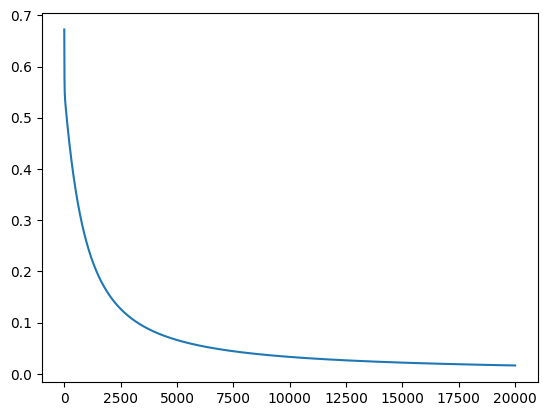

In [75]:
import matplotlib.pyplot as plt
plt.plot(model.J_history)